In [58]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

C:\Users\anees\AppData\Local\Temp\ipykernel_26540\3748546470.py:1: DtypeWarning: Columns (54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])


In [3]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'ball.1', 'noball', 'wide', 'byes', 'legbyes',
       'cur_bat_runs', 'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts',
       'cur_bowl_runs', 'inns_runs', 'inns_wkts', 'inns_balls',
       'inns_runs_rem', 'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target',
       'max_balls', 'date', 'year', 'ground', 'country', 'winner', 'toss',
       'competition', 'bat_hand', 'bowl_style', 'bowl_kind', 'batruns',
       'ballfaced', 'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone',
       'pitchLine', 'pitchLength', 'shotType'],
      dtype='object')

In [4]:
df.head()

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType
0,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,1,1001349_1_1_1,...,0,1,0,True,208,178,3,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
1,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,2,1001349_1_1_2,...,0,1,0,True,243,175,3,ON_THE_STUMPS,GOOD_LENGTH,DEFENDED
2,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001349_1_1_3,...,1,1,1,True,189,242,4,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
3,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001351_1_1_3,...,0,1,0,True,166,194,5,OUTSIDE_OFFSTUMP,SHORT_OF_A_GOOD_LENGTH,DEFENDED
4,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,4,1001351_1_1_4,...,4,1,4,True,15,222,6,OUTSIDE_OFFSTUMP,GOOD_LENGTH,CUT_SHOT


In [5]:
df.shape

(1555016, 55)

In [6]:
df[df['ball']!=df['ball.1']]

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType


ball.1 is duplicate of attribute ball.

In [7]:
df=df.drop(columns='ball.1')
df.shape

(1555016, 54)

In [8]:
df['bowl_style'].unique()

array(['RF', 'RFM', 'LB', 'LWS', 'RMF', 'SLA', 'OB', 'LBG', 'LFM', 'LF',
       'RM', 'LMF', 'RM/OB', 'LM', 'LFM/SLA', 'OB/LB', 'LM/SLA/LWS',
       'OB/SLA', 'RAB', 'LS', '-', 'LSM', 'RSM', 'RMF/OB', 'RFM/OB',
       'OB/LBG', 'RFM/LBG', 'RM/LB', 'RM/LBG', 'LMF/RM', 'RM/RSM',
       'SLA/LWS', 'LAB', 'RMF/LB', 'RFM/LB', 'RM/OB/LB', 'RS'],
      dtype=object)

In [9]:
unique_styles = ['RFM', 'RMF', 'LBG', 'LB', 'LS', 'RAB', 'LAB', 'OB', 'SLA', 'RAB','RSM','LSM']
result = pd.concat([df[df['bowl_style'] == style][['bowl','bowl_style']].drop_duplicates().head(2) for style in unique_styles])
result

,bowl,bowl_style
2276,Nuwan Kulasekara,RFM
3078,Vikum Sanjaya,RFM
7715,Asela Gunaratne,RMF
28810,Andrew Tye,RMF
20353,Fawad Ahmed,LBG
40125,Adam Zampa,LBG
3598,Seekkuge Prasanna,LB
55231,Cameron Boyce,LB
715323,Mohammed Aslam,LS
1100250,Manson Chikowero,LS


There are few bowling types which have ambiguous values. So after researching the bowlers, we came to know:
1. RFM, RMF means Right Arm Medium Fast
2. LBG, LB means Leg Break, which is usually right arm wrist spin bowlers
3. LS, SLA means Slow Left Arm Offie
4. OB means Right Arm Offie
5. RAB,LAB means Right/Left Arm Bowler, who is likely a part timer who don't have any particular style. Thus we are converting them to RSM(right arm slow medium) and LSM(left arm slow medium). 
Now we are changing these values into more understandable format.

In [10]:
df['bowl_style'] = df['bowl_style'].replace(['RFM', 'RMF'], 'RFM')
df['bowl_style'] = df['bowl_style'].replace(['LBG', 'LB'], 'RWS')
df['bowl_style'] = df['bowl_style'].replace(['LS', 'SLA'], 'SLA')
df['bowl_style'] = df['bowl_style'].replace(['RAB'], 'RSM')
df['bowl_style'] = df['bowl_style'].replace(['LAB'], 'LSM')
unique_styles = ['LFM/SLA', 'OB/LB','LM/SLA/LWS','OB/SLA','RMF/OB', 'RFM/OB', 'OB/LBG', 'RFM/LBG', 'RM/LB',
       'RM/LBG', 'LMF/RM', 'RM/RSM', 'SLA/LWS', 'RMF/LB', 'RFM/LB',
       'RM/OB/LB']
replacements = {
    'RFM': 'RFM',
    'RMF': 'RFM',
    'LBG': 'RWS',
    'LB': 'RWS',
    'LS': 'SLA',
    'SLA': 'SLA',
    'RAB': 'RS',
    'LAB': 'LS'
}

# Iterate over unique styles and apply replacements
for style in unique_styles:
    replaced_style = '/'.join([replacements.get(part, part) for part in style.split('/')])
    df['bowl_style'] = df['bowl_style'].replace([style], replaced_style)
df['bowl_style'].unique()

array(['RF', 'RFM', 'RWS', 'LWS', 'SLA', 'OB', 'LFM', 'LF', 'RM', 'LMF',
       'RM/OB', 'LM', 'LFM/SLA', 'OB/RWS', 'LM/SLA/LWS', 'OB/SLA', 'RSM',
       '-', 'LSM', 'RFM/OB', 'RFM/RWS', 'RM/RWS', 'LMF/RM', 'RM/RSM',
       'SLA/LWS', 'RM/OB/RWS', 'RS'], dtype=object)

In [11]:
df.describe()

,p_match,inns,p_bat,p_bowl,ball,score,p_out,over,noball,wide,...,inns_rrr,target,max_balls,year,batruns,ballfaced,bowlruns,wagonX,wagonY,wagonZone
count,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,...,734790.000000,734790.000000,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06,1.555016e+06
mean,1.189249e+06,1.472529e+00,5.063313e+05,5.669614e+05,3.621898e+00,1.278878e+00,5.064079e+05,1.002351e+01,5.713768e-03,3.919445e-02,...,10.341162,160.467006,8.800986e+01,2.019634e+03,1.208229e+00,9.675302e-01,1.253137e+00,8.542429e+01,8.985295e+01,2.142406e+00
std,1.507988e+05,4.992449e-01,3.745988e+05,3.755680e+05,1.821706e+00,1.574933e+00,3.746386e+05,5.640193e+00,9.165189e-02,2.557508e-01,...,14.148199,34.965990,5.238799e+01,2.554390e+00,1.586405e+00,1.772442e-01,1.579409e+00,1.103054e+02,1.100788e+02,2.660308e+00
min,7.223350e+05,1.000000e+00,4.068000e+03,4.068000e+03,1.000000e+00,0.000000e+00,4.068000e+03,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,2.015000e+03,-4.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.125649e+06,1.000000e+00,2.498660e+05,2.976300e+05,2.000000e+00,0.000000e+00,2.498660e+05,5.000000e+00,0.000000e+00,0.000000e+00,...,6.720000,140.000000,0.000000e+00,2.018000e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.213058e+06,1.000000e+00,4.228760e+05,4.937730e+05,4.000000e+00,1.000000e+00,4.229650e+05,1.000000e+01,0.000000e+00,0.000000e+00,...,8.620000,161.000000,1.200000e+02,2.020000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.304057e+06,2.000000e+00,7.240610e+05,8.376110e+05,5.000000e+00,1.000000e+00,7.244950e+05,1.500000e+01,0.000000e+00,0.000000e+00,...,10.880000,182.000000,1.200000e+02,2.022000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.780000e+02,1.890000e+02,4.000000e+00
max,1.412550e+06,2.000000e+00,1.414161e+06,1.413607e+06,3.700000e+01,8.000000e+00,1.414161e+06,2.100000e+01,6.000000e+00,6.000000e+00,...,1002.000000,315.000000,3.000000e+02,2.023000e+03,7.000000e+00,1.000000e+00,8.000000e+00,4.150000e+02,4.660000e+02,8.000000e+00


We can see that the attributes batruns and bowlruns has negative values which is the errors in the data. These data should be removed

In [12]:
df=df[(df['batruns']>=0) & (df['bowlruns']>=0)]
df.shape

(1554800, 54)

Understanding WagonX, WagonY and WagonZone attributes

In [86]:
df.groupby(['wagonZone']).agg({'wagonX':'mean','wagonY':'mean'}).reset_index()

,wagonZone,wagonX,wagonY
0,0,0.000000,0.000000
1,1,228.723680,66.956557
2,2,279.865352,126.732172
3,3,284.987114,212.425044
4,4,221.928538,270.105581
5,5,137.538450,268.838547
6,6,84.483881,207.445834
7,7,86.822784,128.386453
8,8,151.926640,93.098690


In [87]:
total_runs=df.groupby(['p_bat','bat','bowl_style']).agg({'batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)
total_runs['strike rate']=total_runs['batruns']*100/total_runs['ballfaced']
total_runs.head()

,p_bat,bat,bowl_style,batruns,ballfaced,strike rate
5661,249866,Alex Hales,RFM,2799,1825,153.369863
6908,296597,James Vince,RFM,2721,1919,141.792600
9875,348144,Babar Azam,RFM,2662,1952,136.372951
5127,232359,Colin Munro,RFM,2632,1732,151.963048
128,5334,Aaron Finch,RFM,2494,1647,151.426837


In [98]:
total_outs=df[df['out']==True].groupby(['p_bat','bat','bowl_style']).size().reset_index(name='count').sort_values(by='count',ascending=False)
total_outs.head()

,p_bat,bat,bowl_style,count
3743,249866,Alex Hales,RFM,92
4548,296597,James Vince,RFM,79
7832,403902,Liam Livingstone,RFM,78
11681,571911,Joe Clarke,RFM,76
4921,303427,Paul Stirling,RFM,75


In [99]:
merged_df=pd.merge(total_runs,total_outs,on=['p_bat','bat','bowl_style'])
merged_df.columns

Index(['p_bat', 'bat', 'bowl_style', 'batruns', 'ballfaced', 'strike rate',
       'count'],
      dtype='object')

In [100]:
merged_df['average']=merged_df['batruns']/merged_df['count']
merged_df=merged_df[merged_df['batruns']>500].sort_values(by='average',ascending=False)
merged_df.shape

(544, 8)

In [113]:
batters_against_rws=merged_df[merged_df['bowl_style']=='RWS'].sort_values(by='strike rate',ascending=False)
batters_against_rws.head(15)

,p_bat,bat,bowl_style,batruns,ballfaced,strike rate,count,average
145,51880,Chris Gayle,RWS,937,496,188.911290,23,40.739130
214,604302,Nicholas Pooran,RWS,808,514,157.198444,17,47.529412
401,521637,Ben Duckett,RWS,599,384,155.989583,19,31.526316
499,297433,Jonny Bairstow,RWS,527,338,155.917160,17,31.000000
212,219889,David Warner,RWS,814,524,155.343511,19,42.842105
385,226492,Martin Guptill,RWS,613,397,154.408060,19,32.263158
350,8917,Moeen Ali,RWS,647,422,153.317536,30,21.566667
494,720471,Ishan Kishan,RWS,530,348,152.298851,25,21.200000
443,892749,Tim David,RWS,566,378,149.735450,17,33.294118
51,325026,Glenn Maxwell,RWS,1335,903,147.840532,52,25.673077


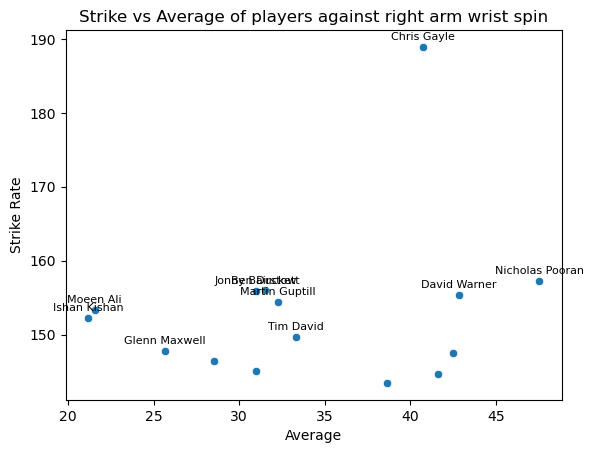

In [112]:
# Create the scatter plot
sns.scatterplot(data=batters_against_rws.iloc[:15], x='average', y='strike rate')

# Annotate each point with player name
for i in range(10):
    bat = batters_against_rws.iloc[i]['bat']
    x = batters_against_rws.iloc[i]['average']
    y = batters_against_rws.iloc[i]['strike rate']
    
    # Adjust the y position of annotation based on index
    y_offset = 0.1 * (i % 2)  # Offset every other annotation
    
    plt.annotate(bat, (x, y), textcoords="offset points", xytext=(0, 5 + y_offset), ha='center', fontsize=8)

# Set labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Strike vs Average of players against right arm wrist spin')

# Show the plot
plt.show()